In [226]:
from enum import Enum
from collections import namedtuple
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image 
import ipywidgets as widgets
import os
from IPython.display import display
from ipywidgets import HBox, VBox
import PIL
import numpy as np
import re

In [3]:
def move(self, direction):
    if direction == 'North':
        self.y += STEP
    elif direction == 'South':
        self.y -= STEP
    elif direction == 'West':
        self.x -= STEP
    elif direction == 'East':
        self.x += STEP

In [4]:
entries = os.listdir('tiles_png/')
path = "tiles_png"
path_mur = "tiles\wall.svg"

In [5]:
Tile = namedtuple("Tile",["name","char"])

In [6]:
# class Tiles:
#     def __init__ (self):
#         self.Tiles.Ant_N=Tile(name="ant-n",char="↑")
    

In [248]:
class Tiles():
        Ant_E=Tile(name="ant-e",char="→")
        Ant_N=Tile(name="ant-n",char="↑")
        Ant_S=Tile(name="ant-s",char="↓")
        Ant_W=Tile(name="ant-w",char="←")
        Exit=Tile(name="exit",char="x")
        SmallRock=Tile(name="nrock",char="ŕ")
        SmallWeb=Tile(name="nweb",char="ẃ")
        Rock=Tile(name="rock",char="r")
        Void=Tile(name="void",char=".")
        Wall=Tile(name="wall",char="o")
        Web=Tile(name="web",char="w")
        Outside=Tile(name="void",char=" ")
        RandomRock=Tile(name="void",char="R")
        RandomWeb=Tile(name="void",char="W")
        
        def __init__(self):
            self.char2N=dict()
            self.char2T=dict()
            self.char2Name()
            self.char2Tile()
        
        #@staticmethod
        def char2Name(self):
            for t in Tiles.__dict__.values():
                if isinstance(t, Tile):
                    self.char2N[t.char]=t.name
        def char2Tile(self):
            p=re.compile('[A-Z]+(\w)*')
            for t in Tiles.__dict__.keys() :
                z=p.match(t)
                if (z!=None):
                    d=z.group()
                    self.char2T[getattr(Tiles,t).char]=d

In [230]:
for t in Tiles.__dict__.values():
    
    if isinstance(t, Tile):
        print(t.name)

ant-e
ant-n
ant-s
ant-w
exit
nrock
nweb
rock
void
wall
web
void
void
void


In [437]:
til = Tiles()
til.char2Tile()
til.char2Name()
t = til.char2N
til.char2N

{'→': 'ant-e',
 '↑': 'ant-n',
 '↓': 'ant-s',
 '←': 'ant-w',
 'x': 'exit',
 'ŕ': 'nrock',
 'ẃ': 'nweb',
 'r': 'rock',
 '.': 'void',
 'o': 'wall',
 'w': 'web',
 ' ': 'void',
 'R': 'void',
 'W': 'void'}

In [10]:
# def affichage(img):
#     file = open(img, "rb")
#     image = file.read()
#     return widgets.Image(
#         value=image,
#         format='png',
#         width=30,
#         height=30,
#     )

In [80]:
path_level = "../../share/laby/levels/"
path_level

'../../share/laby/levels/'

In [450]:
def charger(nom_niveau):
    fichier = open(nom_niveau, 'r+')
    tab = []
    for line in fichier:
        if (len(line)>0 and (line[0] == "o" or line[0] =="." or line[0] =="x")):
            x = line.split()
            tab.append(x)
    return tab

In [451]:
charger(path_level + "0.laby")

[['o', 'o', 'o', 'o', 'o', 'o'],
 ['o', 'w', '.', '.', '.', 'x'],
 ['o', '.', '.', '.', '.', 'o'],
 ['o', '.', '.', '.', '.', 'o'],
 ['o', '.', '↑', '.', 'r', 'o'],
 ['o', 'o', 'o', 'o', 'o', 'o']]

In [259]:
#rajout fonction aléa

In [260]:
# def affichage_niveau(nom_niveau):
#     charger_niveau = charger(nom_niveau)
#     items=[]
#     taille_ligne =0
#     for line in charger_niveau:
#         taille_ligne = len(line)
#         for caractere in line:
#             image = ""
#             image = "tiles_png/" + til.char2N[caractere] + ".png"
#             file = open (image,'rb')
#             image_lu = file.read()
#             items.append(widgets.Image(value = image_lu, format='png', layout=widgets.Layout(display="flex",
#             margin="1px", width="100%"
#             )))
#     display(widgets.GridBox(items,layout=widgets.Layout(grid_template_columns="repeat("+str(taille_ligne)+", 50px)")))

# ANcienne version d'affichage_niveau

In [396]:
# def affichage_niveau(nom_niveau):
#     charger_niveau = charger(nom_niveau)
#     items=[]
#     taille_ligne =0
#     for line in charger_niveau:
#         taille_ligne = len(line)
#         for caractere in line:
#             pof=getattr(Tiles,til.char2T[caractere]).name
#             image = ""
#             image = "tiles_png/" + pof + ".png"
#             file = open (image,'rb')
#             image_lu = file.read()
#             items.append(widgets.Image(value = image_lu, format='png', layout=widgets.Layout(display="flex",
#             margin="1px", width="100%"
#             )))
#     display(widgets.GridBox(items,layout=widgets.Layout(grid_template_columns="repeat("+str(taille_ligne)+", 50px)")))

In [448]:
def affichage_niveau(nom_niveau):
    charger_niveau = remplir_plateau(nom_niveau)
    items=[]
    taille_ligne =0
    for line in charger_niveau:
        taille_ligne = len(line)
        for caractere in line:
           # print(til.char2T[caractere])
            pof=getattr(Tiles,caractere).name
            image = ""
            image = "tiles_png/" + pof + ".png"
#             print(image)
            file = open (image,'rb')
            image_lu = file.read()
            items.append(widgets.Image(value = image_lu, format='png', layout=widgets.Layout(display="flex",
            margin="1px", width="100%"
            )))
    display(widgets.GridBox(items,layout=widgets.Layout(grid_template_columns="repeat("+str(taille_ligne)+", 50px)")))

In [449]:
affichage_niveau(path_level + "0.laby")

GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00\x00 \x08\x06\x00\x00\…

In [309]:
# def remplir_plateau(nom_niveau):
#     charger_niveau = charger(nom_niveau)
#     plateau=[]
#     taille_ligne =0
#     for line in charger_niveau:
#         taille_ligne = len(line)
#         for caractere in line:
#             image = ""
#             image = til.char2T[caractere]
#             plateau.append(image)
#     return plateau



# ANcienne version de remplir_tableau

In [454]:
def remplir_plateau(nom_niveau):
    fichier = open(nom_niveau, 'r+')
    tab = []
    for line in fichier:
        if (len(line)>0 and (line[0] == "o" or line[0] =="." or line[0] =="x")):
            x = line.split()
            tab_line = []
            for i in x:
                bloc = til.char2T[i]
                tab_line.append(bloc)
            tab.append(tab_line)
    return tab

In [401]:
# def remplir_plateau(nom_niveau):
#     charger_niveau = charger(nom_niveau)
#     tab = []
#     for line in charger_niveau:
#         print(line)
#         tab_line = []
#         for x in line:
#             print(x)
#             bloc = til.char2[i]
#             tab_line.append(bloc)
#             tab.append(tab_line)
#     return tab

In [452]:
# def remplir_plateau(nom_niveau):
#     charger_niveau = charger(nom_niveau)
#     tab = []
#     for line in charger_niveau:
#         print(line)
#         tab_line = []
#         for i in x:
#             print(i)
#             bloc = til.char2T[i]
#             tab_line.append(bloc)
#             tab.append(tab_line)
#     return tab

In [455]:
remplir_plateau(path_level + "0.laby")

[['Wall', 'Wall', 'Wall', 'Wall', 'Wall', 'Wall'],
 ['Wall', 'Web', 'Void', 'Void', 'Void', 'Exit'],
 ['Wall', 'Void', 'Void', 'Void', 'Void', 'Wall'],
 ['Wall', 'Void', 'Void', 'Void', 'Void', 'Wall'],
 ['Wall', 'Void', 'Ant_N', 'Void', 'Rock', 'Wall'],
 ['Wall', 'Wall', 'Wall', 'Wall', 'Wall', 'Wall']]

In [398]:
affichage_niveau(path_level + "0.laby")

GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00\x00 \x08\x06\x00\x00\…

In [164]:
# def affichage_level(nom):
#     items=[]
#     x = load(nom)
#     for i in x:
#         print(i)
# #         for j in i:
# #             print(j)
# #             print(til.char2T[j])
    

#         for caractere in x:
#             print(caractere)
#             im=""
#             im="tiles_png/" + til.char2T[caractere] + ".png"
#             file = open (im,'rb')
#             image=file.read()
#             items.append(widgets.Image(value = image, format='png', layout=widgets.Layout(display="flex",
#              margin="1px", width ="100%"
#              )))

#         display(widgets.GridBox(items,layout=widgets.Layout(grid_template_columns="repeat("+str(c)+", 50px)")))

In [183]:
# def affichage_level(nom):
#     f = open(nom, 'r+')
#     text=str(f.read())
#     # print(text)
#     items=[]
#     c=0
#     lines=text.split('\n')
#     for line in lines:
#     #     print("test")
#     #     print(line)
#         if (len(line)>0 and (line[0] == "o" or line[0] =="." or line[0] =="x")):
#     #         print("        test")
#             x = line.split()
#             c=len(x)
#             for caractere in x:
#     #             print("    test")
#                 #print(til.char2T[caractere])
#     #             print("tiles_png/" + til.char2T[caractere] + ".png")
#                 im=""
#                 if til.char2T[caractere]=="↑":
#                     im="tiles_png/ant-n.png"
#                 else:
#                     im="tiles_png/" + til.char2T[caractere] + ".png"
#                 file = open (im,'rb')
#                 image=file.read()
#                 items.append(widgets.Image(value = image, format='png', layout=widgets.Layout(display="flex",
#     #             flex_flow="row", border="none",padding="-2px", grid_gap="0%",
#                 margin="1px", width ="100%"
#                 )))

#     display(widgets.GridBox(items,layout=widgets.Layout(grid_template_columns="repeat("+str(c)+", 50px)")))

In [159]:
# affichage_level(path_level + "0.laby")

GridBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00\x00 \x08\x06\x00\x00\…

In [18]:
# f = open("1a.laby")
# for line in f:
#     if (line[0] == "o"):
#         x = line.split()
#         for caractere in x:
#             x = Image(filename="tiles_png/" + til.char2T[caractere] + ".png")
#             display(x)

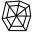

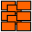

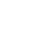

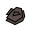

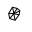

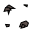

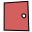

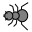

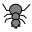

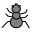

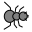

In [19]:
from IPython.display import Image
from IPython.display import display
touteslesimages = []
for image in entries:
        imagesans = image.split(".")
        nom_image = imagesans[0]
#         print("image_nom: " + nom_image)
        touteslesimages.append(nom_image)
#         print(touteslesimages)
#         x = Image(filename="tiles_png/" + imagesans[0] + ".png") 
#         y = Image(filename="tiles_png/" + imagesans[0] + ".png") 
#         display(x, y)
# print(touteslesimages)


for elm in touteslesimages:
#     print(elm)
    x = Image(filename="tiles_png/" + elm + ".png")
    display(x)

In [20]:
# for caractere in t.name:
#     print(caractere)

In [21]:
for t in Tiles.__dict__.values():
    if isinstance(t, Tile):
        print(t.name)
        til.char2T[t.char] = t.name

ant-e
ant-n
ant-s
ant-w
exit
nrock
nweb
rock
void
wall
web
void
void
void


In [245]:
remplir_plateau(path_level + "4a.laby")

[]

In [219]:
class Board : public std::vector<std::vector<Tile>> {
    public:
    Tile get(Position position) {
        if (position.i < 0 or
            position.j < 0 or
            position.i >= size() or
            position.j >= at(0).size()) {
            return Tile::Outside;
        }
        return at(position.i)[position.j];
    }
    void set(Position position, Tile tile) {
        if (position.i < 0 or
            position.j < 0 or
            position.i >= size() or
            position.j >= at(0).size()) {
            // TODO: use a more precise exception
            throw std::runtime_error("position out of the board");
        }
        at(position.i)[position.j] = tile;
    }
};

In [254]:
class Board():
    
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-254-755b16528cbc>, line 4)